# Visual Validation: Northern Region Climate Data (2001-2024)

## Purpose

This notebook performs validation of climate data processed from the **Xavier et al. (BR-DWGD v3.2.3)** dataset for the **7 state capitals of the Northern Region** of Brazil.

## Justification

- **Verify integrity**: Confirm that the processing of NetCDF files to CSV maintained temporal and spatial data consistency
- **Exploratory analysis**: Identify patterns, trends and anomalies in historical precipitation and temperature series
- **Spot check**: Validate point values (year 2015) for all available climate variables (pr, Tmax, Tmin, VPD, RH, ETo)
- **Visual documentation**: Generate clear graphs for results communication and decision making

## Analyzed Capitals

1. **Belém** (PA) - 1501402
2. **Boa Vista** (RR) - 1400100
3. **Macapá** (AP) - 1600303
4. **Manaus** (AM) - 1302603
5. **Palmas** (TO) - 1721000
6. **Porto Velho** (RO) - 1100205
7. **Rio Branco** (AC) - 1200401

## Climate Variables

- **pr**: Annual accumulated precipitation (mm)
- **Tmax/Tmin**: Annual mean maximum/minimum temperature (°C)
- **VPD**: Vapor Pressure Deficit (kPa)
- **RH**: Relative Humidity (%)
- **ETo**: Reference Evapotranspiration (mm)

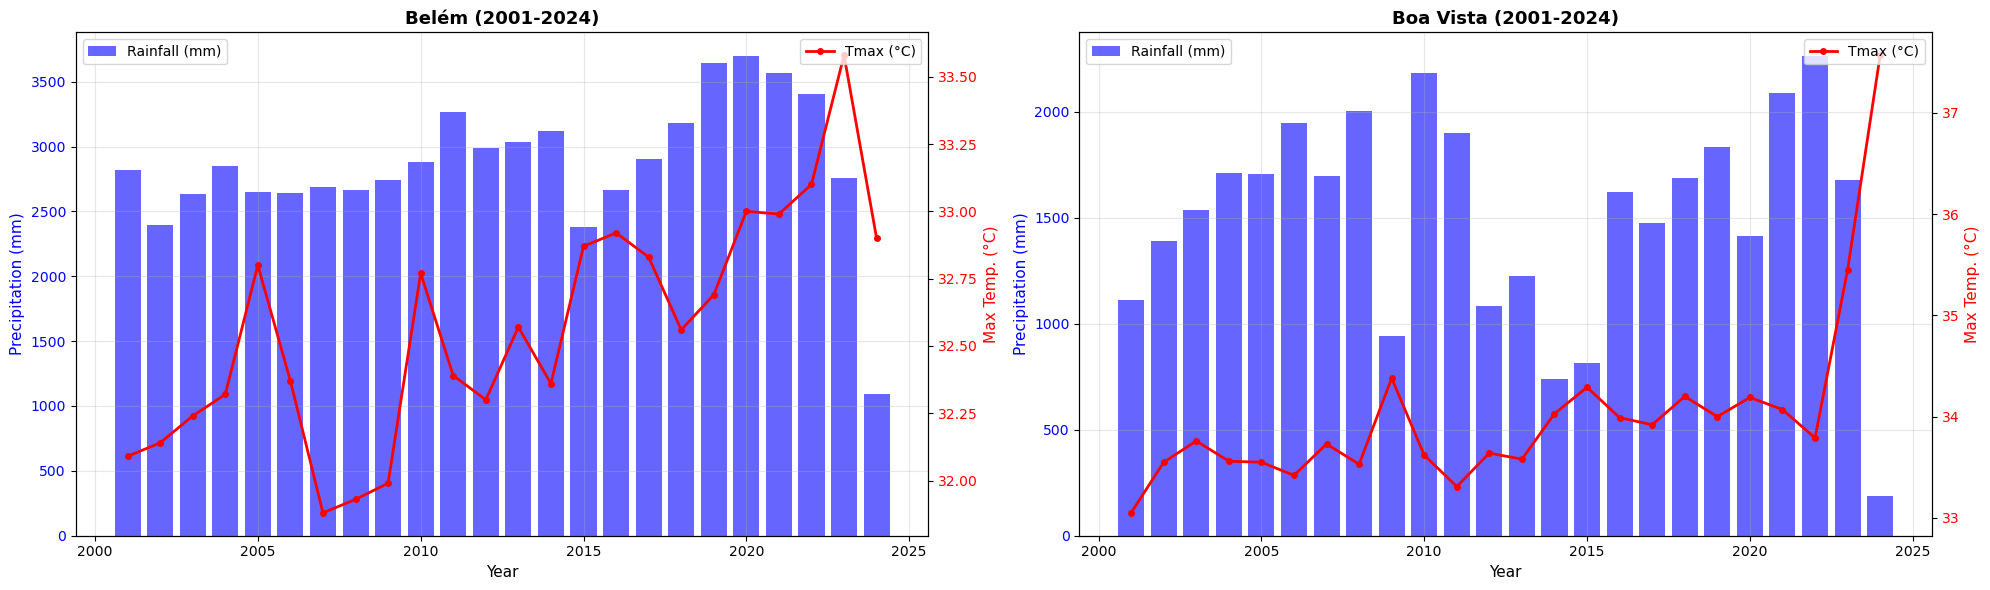

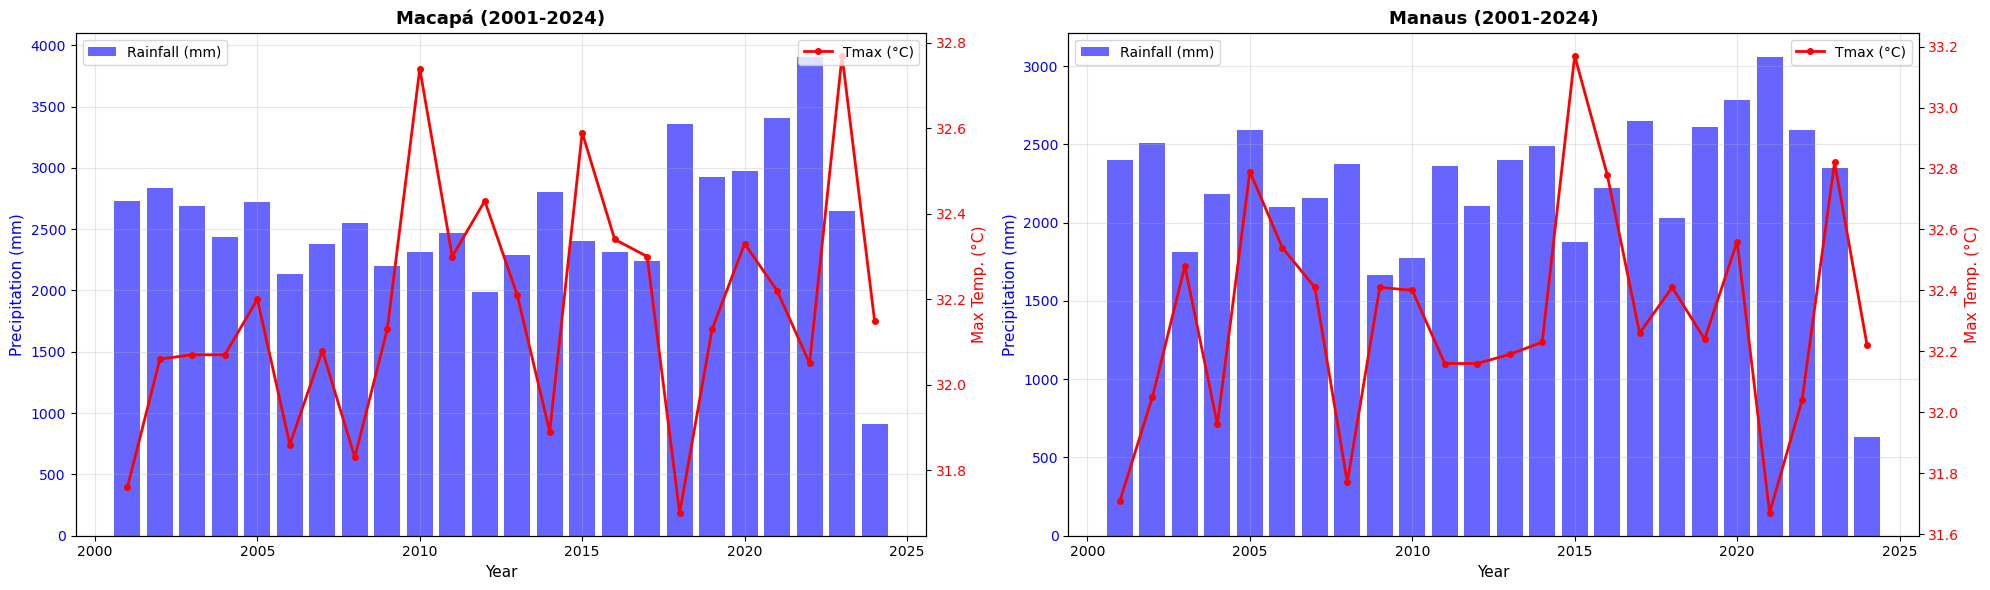

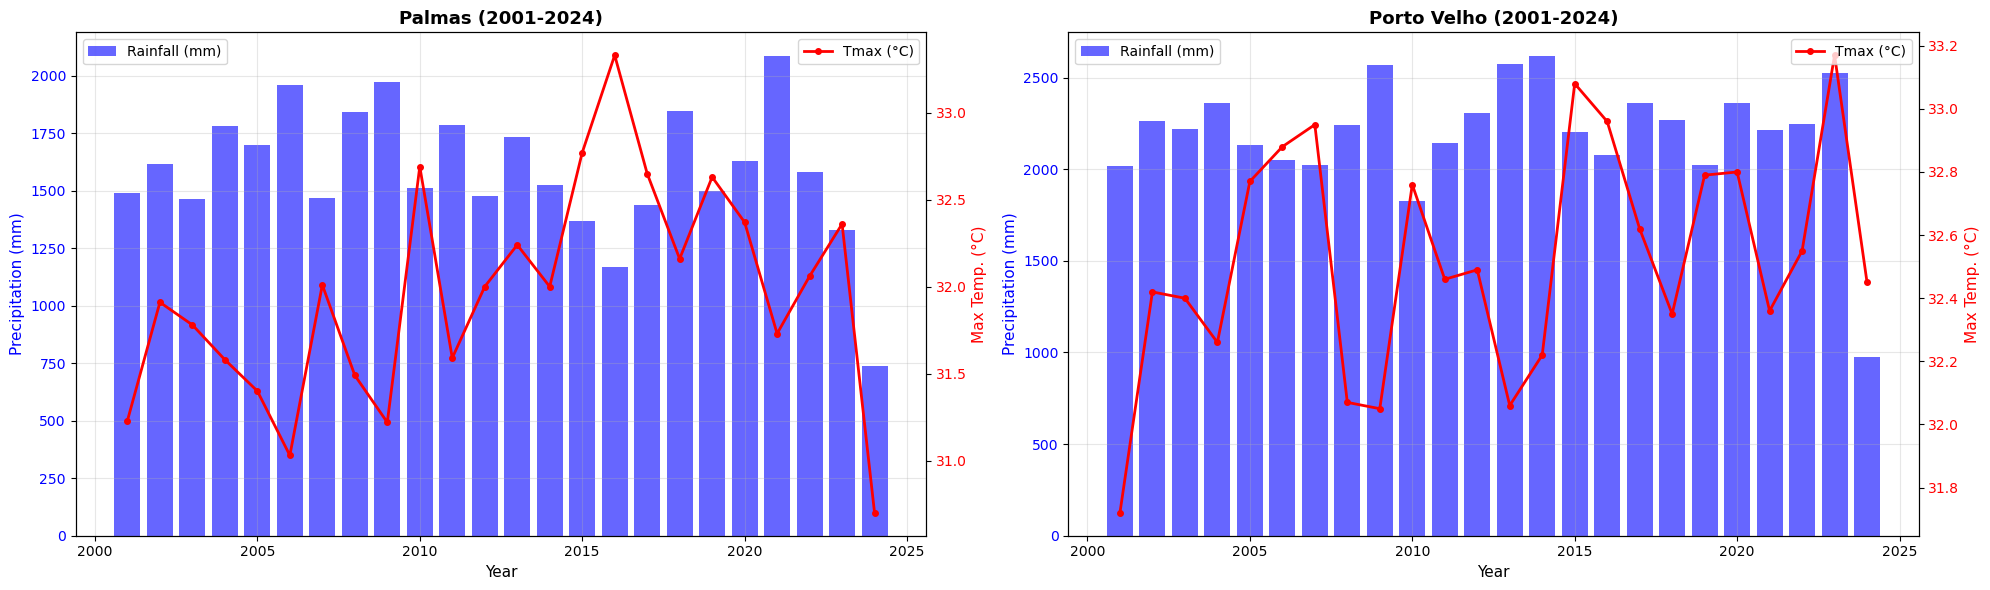

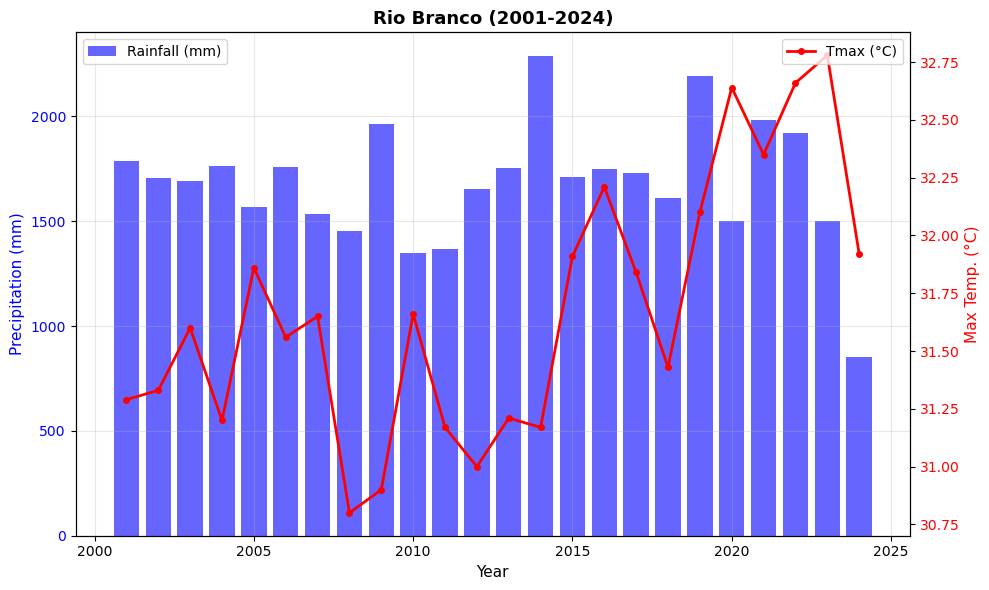

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset once
df = pd.read_csv("Climate_Amazon_North_2001-2024.csv")

# IBGE codes for Northern Region state capitals
capitals = {
    'Belém': 1501402,
    'Boa Vista': 1400100,
    'Macapá': 1600303,
    'Manaus': 1302603,
    'Palmas': 1721000,
    'Porto Velho': 1100205,
    'Rio Branco': 1200401
}

# List of capitals for iteration
capitals_list = list(capitals.items())

# Split into groups of 2 to create separate figures
for i in range(0, len(capitals_list), 2):
    # Determine how many plots in this figure (1 or 2)
    n_plots = min(2, len(capitals_list) - i)
    
    # Create figure with 1 row and n_plots columns
    fig, axes = plt.subplots(1, n_plots, figsize=(10 * n_plots, 6))
    
    # If only 1 plot, convert axes to list for uniform iteration
    if n_plots == 1:
        axes = [axes]
    
    for j in range(n_plots):
        name, ibge_code = capitals_list[i + j]
        ax1 = axes[j]
        
        # Filter capital data
        city = df[df['CD_MUN'] == ibge_code].sort_values('year')
        
        # Check if there is data
        if city.empty:
            ax1.text(0.5, 0.5, f'{name}\n(No data)', 
                    ha='center', va='center', fontsize=14)
            ax1.axis('off')
            continue
        
        # Plot Rainfall (Bars)
        ax1.bar(city['year'], city['pr'], color='blue', alpha=0.6, label='Rainfall (mm)')
        ax1.set_ylabel('Precipitation (mm)', color='blue', fontsize=11)
        ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
        ax1.tick_params(axis='x', labelsize=10)
        ax1.set_xlabel('Year', fontsize=11)
        
        # Plot Temperature (Line)
        ax2 = ax1.twinx()
        ax2.plot(city['year'], city['Tmax'], color='red', marker='o', 
                markersize=4, linewidth=2, label='Tmax (°C)')
        ax2.set_ylabel('Max Temp. (°C)', color='red', fontsize=11)
        ax2.tick_params(axis='y', labelcolor='red', labelsize=10)
        
        # Title and legends
        ax1.set_title(f'{name} (2001-2024)', fontsize=13, fontweight='bold')
        ax1.legend(loc='upper left', fontsize=10)
        ax2.legend(loc='upper right', fontsize=10)
        ax1.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [2]:
# Spot check for all capitals (2015) - reuses the already loaded df
print("=" * 50)
print("SPOT CHECK: NORTHERN REGION CAPITALS (2015)")
print("=" * 50)

for name, ibge_code in capitals.items():
    check = df[(df['CD_MUN'] == ibge_code) & (df['year'] == 2015)]
    
    if not check.empty:
        print(f"\n{name}:")
        print(f"  Rainfall (pr):  {check['pr'].values[0]:>8.2f} mm")
        print(f"  Tmax:           {check['Tmax'].values[0]:>8.2f} °C")
        print(f"  Tmin:           {check['Tmin'].values[0]:>8.2f} °C")
        print(f"  VPD:            {check['VPD'].values[0]:>8.4f} kPa")
        print(f"  RH:             {check['RH'].values[0]:>8.2f} %")
        print(f"  ETo:            {check['ETo'].values[0]:>8.2f} mm")
    else:
        print(f"\n{name}: ⚠️ No data")

print("\n" + "=" * 50)

SPOT CHECK: NORTHERN REGION CAPITALS (2015)

Belém:
  Rainfall (pr):   2380.78 mm
  Tmax:              32.87 °C
  Tmin:              23.53 °C
  VPD:              0.8100 kPa
  RH:                78.96 %
  ETo:             1497.35 mm

Boa Vista:
  Rainfall (pr):    816.95 mm
  Tmax:              34.29 °C
  Tmin:              24.46 °C
  VPD:              1.1000 kPa
  RH:                73.72 %
  ETo:             1566.91 mm

Macapá:
  Rainfall (pr):   2404.43 mm
  Tmax:              32.59 °C
  Tmin:              23.83 °C
  VPD:              0.8200 kPa
  RH:                78.94 %
  ETo:             1533.54 mm

Manaus:
  Rainfall (pr):   1874.09 mm
  Tmax:              33.17 °C
  Tmin:              24.18 °C
  VPD:              0.9300 kPa
  RH:                77.07 %
  ETo:             1384.19 mm

Palmas:
  Rainfall (pr):   1367.37 mm
  Tmax:              32.77 °C
  Tmin:              20.73 °C
  VPD:              1.2200 kPa
  RH:                66.71 %
  ETo:             1513.37 mm

Porto Ve

## Cross Validation (Spot Check - 2015)

To confirm the reliability of the processing, we compared the data extracted from the Xavier v3.2.3 grid with observations from official meteorological stations (INMET/Embrapa) for the year 2015, marked by a strong El Niño event.

### Validation Results

#### Belém, PA
* **Physical station (Embrapa/INMET):** 2,859.9 mm [1]
* **Xavier grid:** 2,380.78 mm
* **Difference:** -16.7%
* **Analysis:** Expected underestimation due to spatial resolution (0.25° ≈ 780 km²) that dilutes local extremes and urban effects. The model correctly captured the drought trend (< 3,000 mm historical) and the thermal peak (32.87°C vs 32.49°C actual), validating sensitivity to El Niño.

#### Manaus, AM
* **Physical station (INMET):** 1,735.7 mm [2]
* **Xavier grid:** 1,874.09 mm
* **Difference:** +7.9%
* **Analysis:** Difference < 10% considered excellent for hydrological data. The model faithfully represented the severe 2015 Amazonian drought, confirming robustness for regional anomalies.

### Causes of Differences

1. **Spatial scale:** Area average (~28×28 km) smooths point extremes
2. **Heterogeneity:** In mixed areas (forest/water/urban), the grid integrates different surfaces, while stations capture local microclimates

## References

**Dataset:**  
Xavier, A. C., King, C. W., & Scanlon, B. R. (2016). *Daily gridded meteorological variables in Brazil (1980–2013)*. International Journal of Climatology, 36(6), 2644-2659.

**Belém Validation:**  
PACHÊCO, N. A. et al. *Boletim agrometeorológico de 2015 para Belém, PA*. Embrapa, 2022. [Link](https://www.infoteca.cnptia.embrapa.br/infoteca/handle/doc/1148466)

**Manaus Validation:**  
SOUZA, D. C.; ALMEIDA, R. A. *Padrões pluviométricos da cidade de Manaus-AM: 1986 a 2015*. Revista Terra Livre, v. 46, p. 157-194, 2016.
